# Sales Analysis 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('Sales_Data.xlsx')

### First three records of dataset

In [3]:
df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


### Total Rows and Columns

In [4]:
print(f'Rows:{df.shape[0]}  and Columns : {df.shape[1]}' )

Rows:51290  and Columns : 21


### Columns Names

In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

### Checking the Null Values

In [7]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


## OVERALL SALES TREND

In [9]:
# extracting the Year and Month from Order date
df['year_month']=df['order_date'].apply(lambda x: x.strftime('%Y- %m'))

In [10]:
df['year_month']

0        2011- 01
1        2011- 01
2        2011- 01
3        2011- 01
4        2011- 01
           ...   
51285    2014- 12
51286    2014- 12
51287    2014- 12
51288    2014- 12
51289    2014- 12
Name: year_month, Length: 51290, dtype: object

In [11]:
# Grouping the Sales By Year and Month
temp=df.groupby('year_month').sum()['sales'].reset_index().round()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_5256\1148518023.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp=df.groupby('year_month').sum()['sales'].reset_index().round()


In [12]:
temp

,year_month,sales
0,2011- 01,98898.0
1,2011- 02,91152.0
2,2011- 03,145729.0
3,2011- 04,116916.0
4,2011- 05,146748.0
5,2011- 06,215207.0
6,2011- 07,115510.0
7,2011- 08,207581.0
8,2011- 09,290214.0
9,2011- 10,199071.0


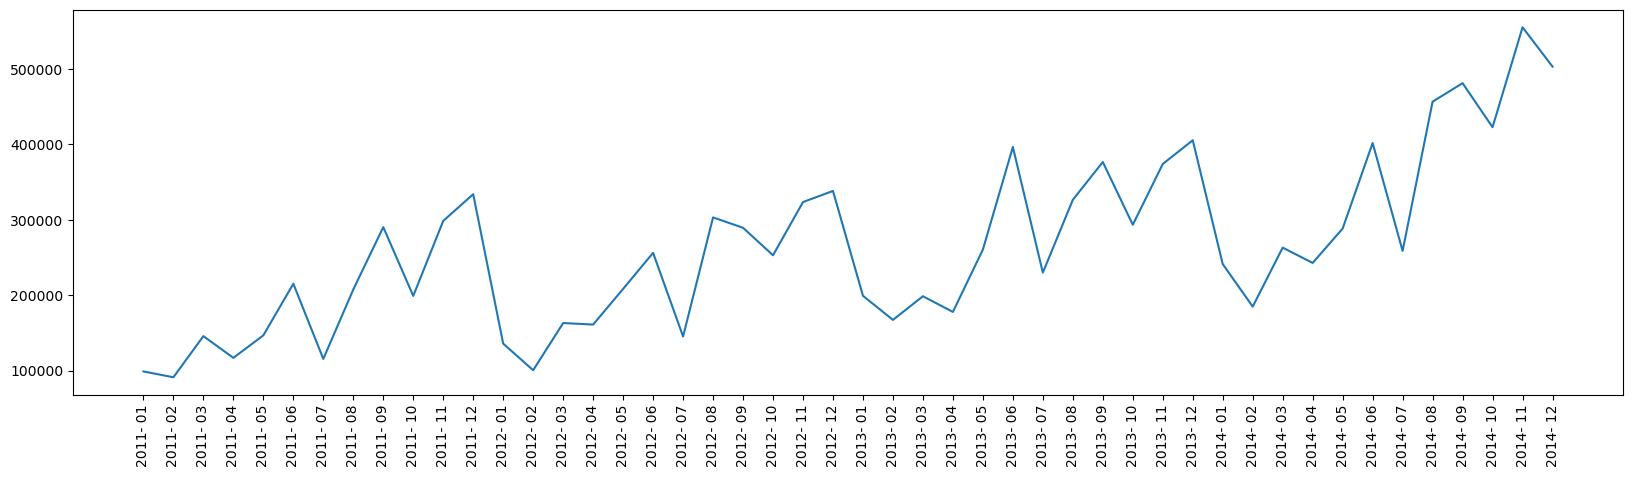

In [13]:
plt.figure(figsize=(20,5))
plt.plot(temp['year_month'],temp['sales'])
plt.xticks(rotation='vertical')
plt.show()

## TOP 10 Product Name By Sales

In [14]:
temp_prd=df.groupby('product_name').sum()['sales'].sort_values(ascending=False).head(10).reset_index()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_5256\1831386813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_prd=df.groupby('product_name').sum()['sales'].sort_values(ascending=False).head(10).reset_index()


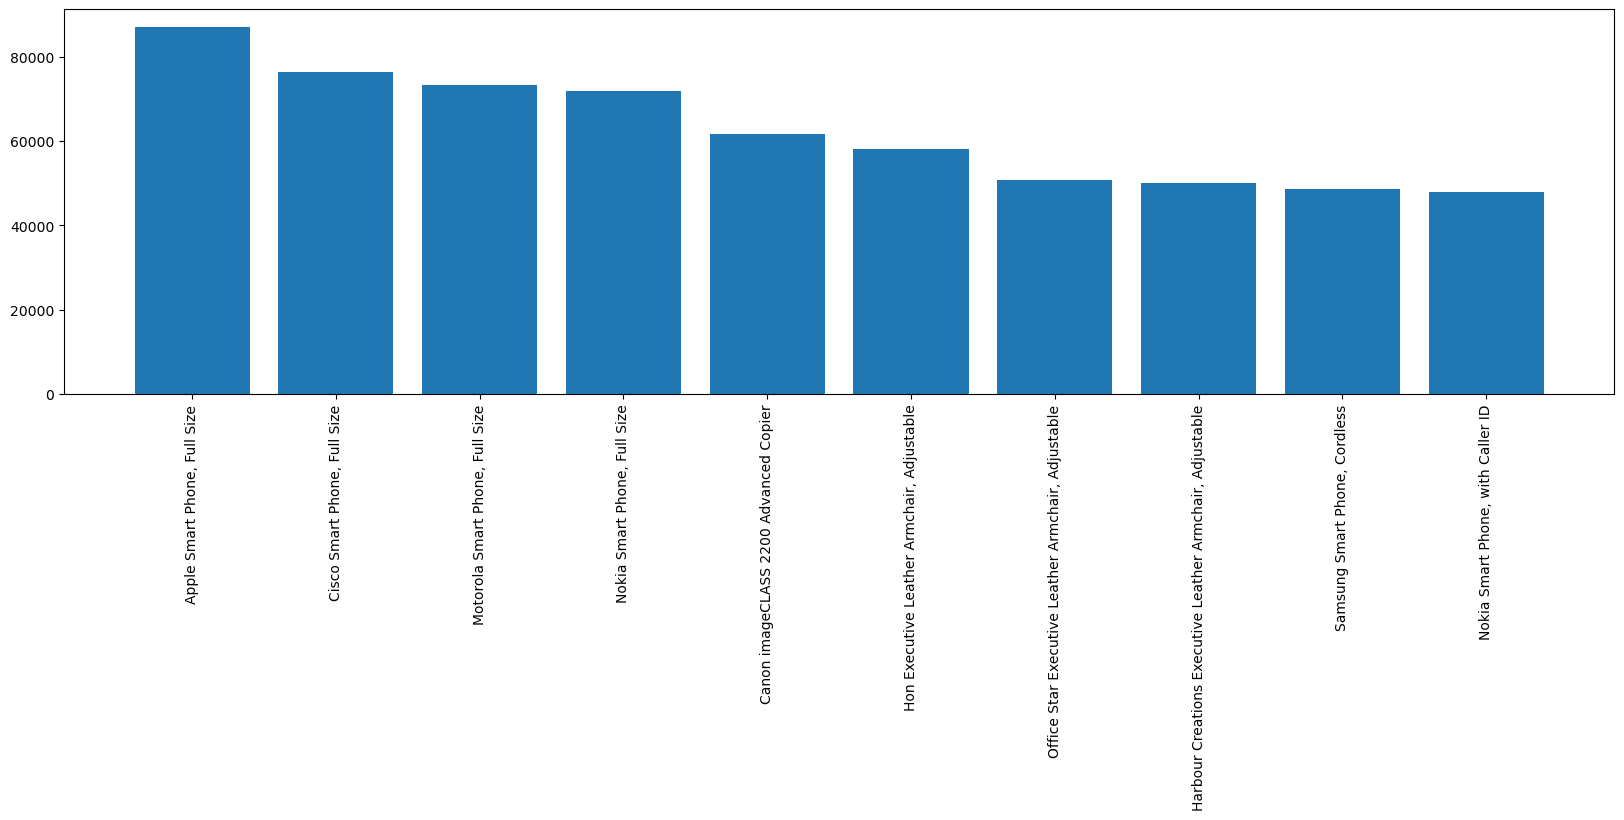

In [15]:
plt.figure(figsize=(20,5),)
plt.bar(temp_prd['product_name'],temp_prd['sales'])
plt.xticks(rotation='vertical')
plt.show()

## Top Selling Product by Quantity

In [16]:
temp_quantity=df.groupby('product_name').count()['quantity'].sort_values(ascending=False).head(10).reset_index()

In [17]:
temp_quantity

,product_name,quantity
0,Staples,227
1,"Cardinal Index Tab, Clear",92
2,"Eldon File Cart, Single Width",90
3,"Rogers File Cart, Single Width",84
4,"Ibico Index Tab, Clear",83
5,"Sanford Pencil Sharpener, Water Color",80
6,"Smead File Cart, Single Width",77
7,"Stanley Pencil Sharpener, Water Color",75
8,"Acco Index Tab, Clear",75
9,"Avery Index Tab, Clear",74


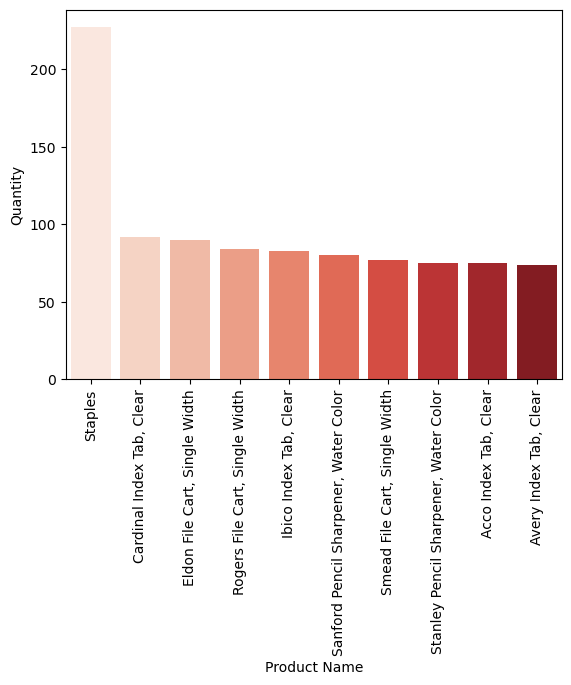

In [18]:
sns.barplot(x=temp_quantity['product_name'],y=temp_quantity['quantity'],data=temp_quantity,palette='Reds')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation='vertical')
plt.show()

## MOst Preferred Ship Mode

In [23]:
temp_shipmode=df.groupby('ship_mode').count()['order_id'].reset_index()

In [26]:
temp_shipmode

,ship_mode,order_id
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


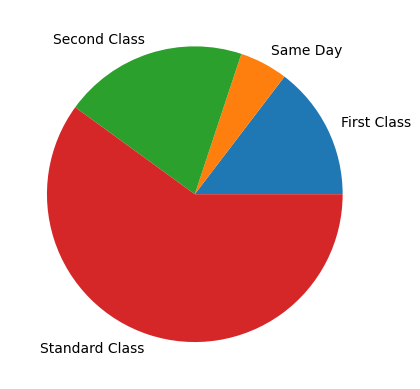

In [28]:
plt.pie(temp_shipmode['order_id'],labels=temp_shipmode['ship_mode'])
plt.show()
#temp_shipmode['ship_mode']

## Most Profitable Category and Subcategory

In [50]:
temp_category=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])
temp_category.sort_values(['category','profit'], ascending=False)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_5256\3949817523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_category=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870